<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/MPCR_Ants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import exp
from time import time
from random import random
from matplotlib import cm
from bisect import bisect
from random import uniform
from random import randrange
import matplotlib.pyplot as plt
from scipy.special import factorial
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

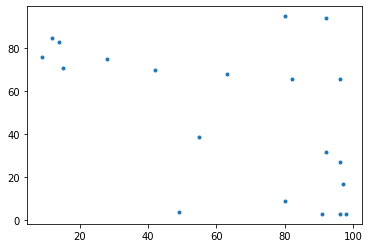

In [ ]:
# Simple set of point with known minima
x = np.array([82, 91, 12, 92, 63, 9, 28, 55, 96, 97, 15, 98, 96, 49, 80, 14, 42, 92, 80, 96])
y = np.array([66, 3, 85, 94, 68, 76, 75, 39, 66, 17, 71, 3, 27, 4, 9, 83, 70, 32, 95, 3])
cities = np.vstack((x,y)).T
plt.plot(cities[:,0],cities[:,1],'.')

In [ ]:
def pdist(pts):
    return np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

In [ ]:
D = pdist(cities)

In [ ]:
def TourLength(tour):
    return np.sum(D[tour[:,0:-1],tour[:,1:]],1) + D[tour[:,n-2],tour[:,0]]

In [ ]:
def choose(w):
    c = np.cumsum(w)
    return bisect(c, np.random.random() * c[-1])

In [ ]:
def plot_tour(tour):
    tour1 = np.hstack((tour,tour[0]))
    plt.plot(cities[:,0],cities[:,1],'.')
    plt.plot(cities[tour1,0],cities[tour1,1],'r-')
    plt.show()

0 637.3798195923634


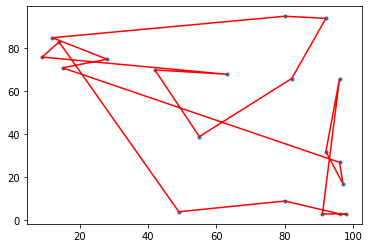

1 496.02172404786864


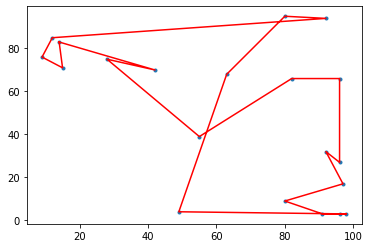

5 487.2544086954016


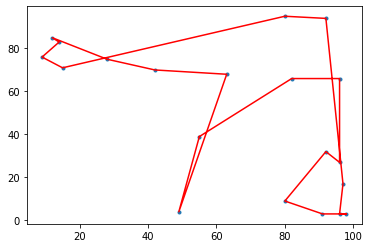

7 475.87320789876514


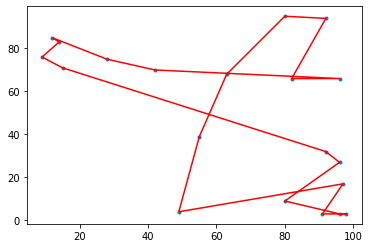

8 433.4968056928371


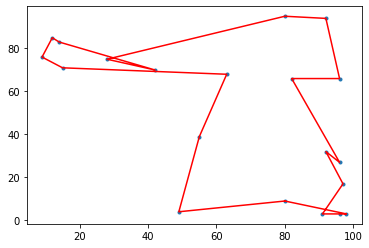

11 419.37302679742635


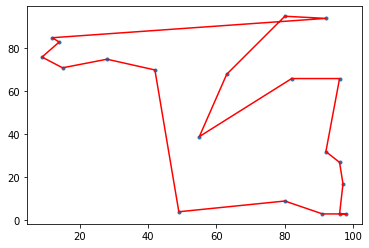

19 418.105372437626


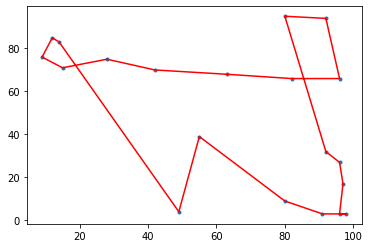

21 409.9734708059611


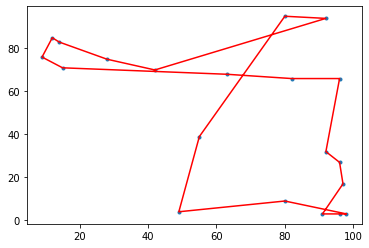

25 391.9735289230296


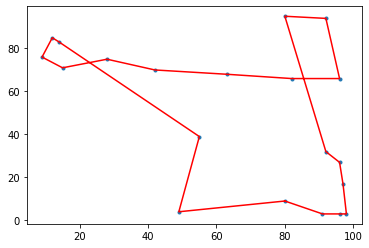

29 363.61701866254805


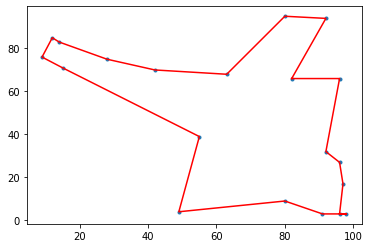

153 360.83240620251274


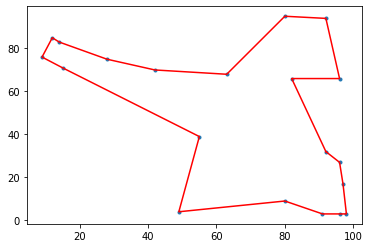

In [ ]:
n = len(x)                                              # Dimension of problem, number of cities in tour
t = 1000                                                # Simulation steps
m = 40                                                  # Number of ant agents 
Q = 1                                                   # Pheromone constant
rho = 0.05                                              # Evaporation constant    
eta = np.divide(1,D,out=np.zeros_like(D),where=D!=0)    # Proximity matrix         
tau = 10*Q/(n*np.mean(D))*np.ones((n,n))                # Pheromone matrix

ants_tour = np.zeros((m,n)).astype(int)
ants_cost = np.zeros((m,))

best_tour = np.random.permutation(n)
best_cost = 10**10

for it in range(t):

    ants_tour[:,0] = np.random.randint(0,n,(m,))

    for k in range(m):
        
        for l in range(n-1):
            i = ants_tour[k,l]
            P = tau[i,:] * eta[i,:]
            P[ants_tour[k,:l]] = 0
            P = P / np.sum(P)
            ants_tour[k,l+1] = choose(P)

    
    ants_cost = TourLength(ants_tour)
    a = np.argmin(ants_cost)
    if ants_cost[a] < best_cost:
        best_tour = ants_tour[a,:]
        best_cost = ants_cost[a]
        print(it,best_cost)
        plot_tour(best_tour)


    for k in range(m):
        tour = np.hstack((ants_tour[k,:],ants_tour[k,0]))
        tau[tour[1:],tour[:-1]] += Q/ants_cost[k]


    tau = (1-rho)*tau

In [ ]:
import torch
from torch import tensor 
from torch.autograd import Variable
from torch import randn

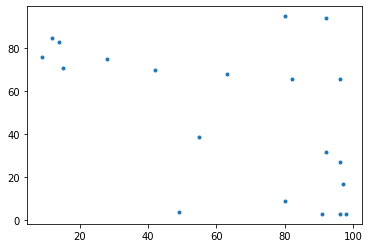

In [ ]:
# Simple set of point with known minima
x = np.array([82, 91, 12, 92, 63, 9, 28, 55, 96, 97, 15, 98, 96, 49, 80, 14, 42, 92, 80, 96])
y = np.array([66, 3, 85, 94, 68, 76, 75, 39, 66, 17, 71, 3, 27, 4, 9, 83, 70, 32, 95, 3])
cities = np.vstack((x,y)).T
plt.plot(cities[:,0],cities[:,1],'.')

In [ ]:
def pdist(pts):
    return np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

In [ ]:
D = pdist(cities)

In [ ]:
def TourLength(tour):
    return np.sum(D[tour[:,0:-1],tour[:,1:]],1) + D[tour[:,n-2],tour[:,0]]

In [ ]:
def choose(w):
    c = np.cumsum(w)
    return bisect(c, np.random.random() * c[-1])

In [ ]:
def plot_tour(tour):
    tour1 = np.hstack((tour,tour[0]))
    plt.plot(cities[:,0],cities[:,1],'.')
    plt.plot(cities[tour1,0],cities[tour1,1],'r-')
    plt.show()

0 652.0045298977544


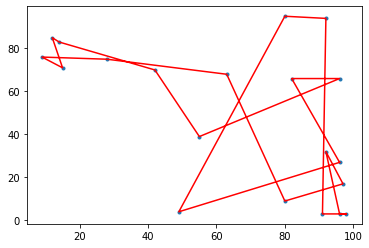

1 522.8229663417476


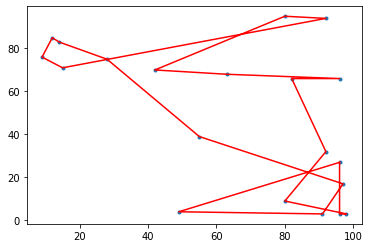

3 500.5961622787854


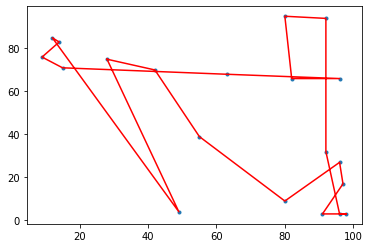

6 475.8582862172381


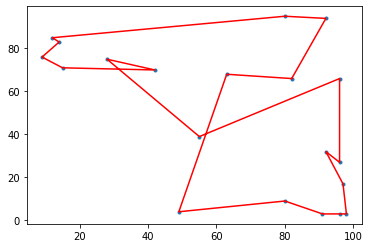

8 458.7611995906241


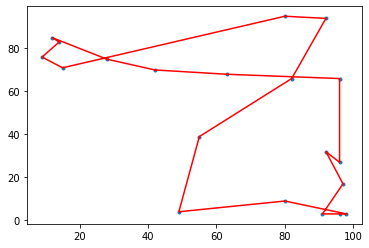

11 436.4438674820166


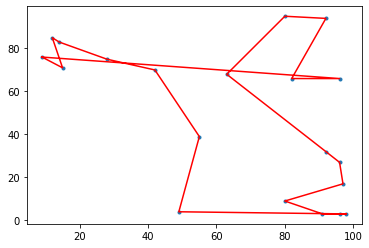

12 413.11440245578683


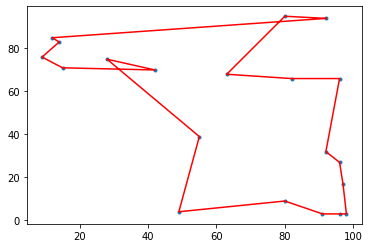

15 396.00732962082145


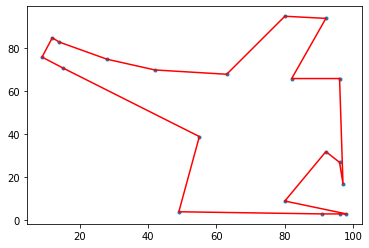

18 394.48902215750456


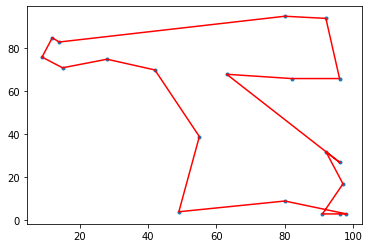

38 388.1347224055713


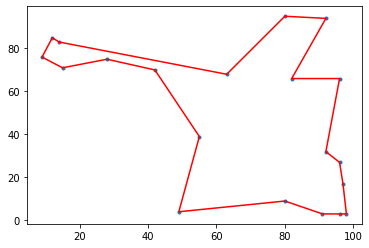

40 387.8472802871057


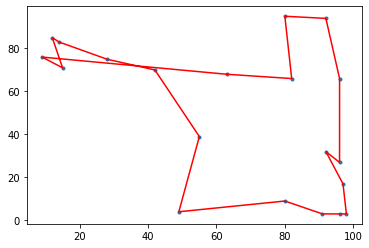

53 385.3309993067878


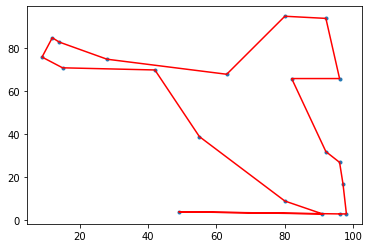

70 377.58400251734525


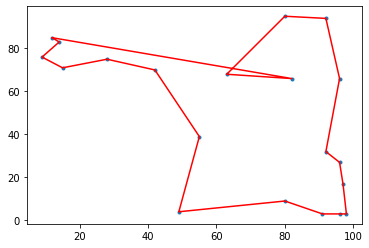

167 373.8929388174145


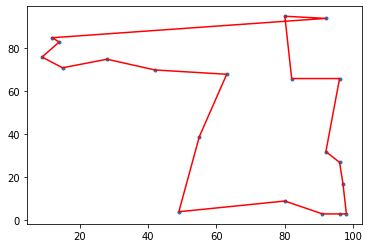

182 365.5786975290079


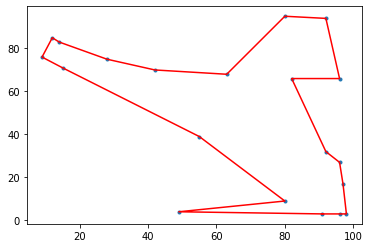

210 360.8324062025128


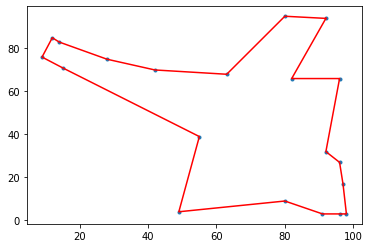

In [ ]:
n = len(x)                                              # Dimension of problem, number of cities in tour
t = 1000                                                # Simulation steps
m = 40                                                  # Number of ant agents 
Q = 1                                                   # Pheromone constant
rho = 0.00001                                               # Evaporation constant    
eta = np.divide(1,D,out=np.zeros_like(D),where=D!=0)    # Proximity matrix         
tau = 10*Q/(n*np.mean(D))*np.ones((n,n))                # Pheromone matrix

ants_tour = np.zeros((m,n)).astype(int)
ants_cost = np.zeros((m,))

best_tour = np.random.permutation(n)
best_cost = 10**10

for it in range(t):

    ants_tour[:,0] = np.random.randint(0,n,(m,))

    for k in range(m):
        
        for l in range(n-1):
            i = ants_tour[k,l]
            P = tau[i,:] * eta[i,:]
            P[ants_tour[k,:l]] = 0
            P = P / np.sum(P)
            ants_tour[k,l+1] = choose(P)

    
    ants_cost = TourLength(ants_tour)
    a = np.argmin(ants_cost)
    if ants_cost[a] < best_cost:
        best_tour = ants_tour[a,:]
        best_cost = ants_cost[a]
        print(it,best_cost)
        plot_tour(best_tour)


    for k in range(m):
        tour = np.hstack((ants_tour[k,:],ants_tour[k,0]))
        tau[tour[1:],tour[:-1]] += Q/ants_cost[k]


    tau = (1-rho)*tau